In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_Tamil_films_of_2023"

# Send a GET request to fetch the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all tables with the class 'wikitable'
tables = soup.find_all('table', class_='wikitable')

# Print the number of tables found
print(f"Number of tables found: {len(tables)}")

# Initialize a list to store movie data
movies = []

# Month mapping
month_map = {
    1: '01', 2: '02', 3: '03',
    4: '04', 5: '05', 6: '06',
    7: '07', 8: '08', 9: '09',
    10: '10', 11: '11', 12: '12'
}

# Function to process the rows of each table
def process_table(table, start_month):
    rows = table.find_all('tr')
    current_month = start_month
    prev_date = None
    current_date = None

    for row in rows[1:]:  # Skip the header row
        columns = row.find_all('td')
        if len(columns) ==6:  # Ensure there are enough columns
            date = columns[0].get_text(strip=True) if columns[0].get_text(strip=True).isdigit() else current_date
            title = columns[1].get_text(strip=True)
            link = columns[1].find('a')['href'] if columns[1].find('a') else None
            director = columns[2].get_text(strip=True)
            cast = columns[3].get_text(strip=True)
            production = columns[4].get_text(strip=True)

            if date and date.isdigit():  # Only process rows where date is a valid digit
                if prev_date and int(date) < int(prev_date):
                    current_month += 1

                current_date = date
                formatted_date = f"2023-{month_map[current_month]}-{int(current_date):02d}"
                movies.append({
                    'Date': formatted_date,
                    'Title': title,
                    'Link': link,
                    'Director': director,
                    'Cast': cast,
                    'Production': production
                })
                prev_date = date

        if(len(columns)==5):
            #print(columns)
            date = columns[0].get_text(strip=True) if columns[0].get_text(strip=True).isdigit() else current_date
            title = columns[0].get_text(strip=True)
            link = columns[0].find('a')['href'] if columns[0].find('a') else None
            director = columns[1].get_text(strip=True)
            cast = columns[2].get_text(strip=True)
            production = columns[3].get_text(strip=True)

            if date and date.isdigit():  # Only process rows where date is a valid digit
               if prev_date and int(date) < int(prev_date):
                   current_month += 1

               current_date = date
               formatted_date = f"2023-{month_map[current_month]}-{int(current_date):02d}"
               movies.append({
                   'Date': formatted_date,'Title': title,'Link': link,'Director': director,'Cast': cast,'Production': production
                })
               prev_date = date
        if(len(columns)==7):
            print(columns)
            date = columns[1].get_text(strip=True) if columns[1].get_text(strip=True).isdigit() else current_date
            title = columns[2].get_text(strip=True)
            link = columns[2].find('a')['href'] if columns[2].find('a') else None
            director = columns[3].get_text(strip=True)
            cast = columns[4].get_text(strip=True)
            production = columns[5].get_text(strip=True)
            print(date,title,link,director,cast,production)
            if date and date.isdigit():  # Only process rows where date is a valid digit
               if prev_date and int(date) < int(prev_date):
                   current_month += 1

               current_date = date
               formatted_date = f"2023-{month_map[current_month]}-{int(current_date):02d}"
               movies.append({
                   'Date': formatted_date,'Title': title,'Link': link,'Director': director,'Cast': cast,'Production': production
                })
               prev_date = date




# Start with the actual first month of each quarter
start_months = [1,1, 4, 7, 10]

# Ensure we process up to the number of quarters available
num_quarters = min(len(tables) - 1, len(start_months))

# Iterate over each table starting from the second one
for i in range(num_quarters):
    process_table(tables[i + 1], start_months[i])

# Create a DataFrame from the list
movies_df = pd.DataFrame(movies)
print(movies_df.head())

# Optionally, save the DataFrame to a CSV file
movies_df.to_csv('tamil_films_2023.csv', index=False)


Number of tables found: 6
[<td rowspan="8" style="text-align:center;background:#ffa07a;textcolor:#000;"><b>J<br/>A<br/>N</b>
</td>, <td rowspan="2" style="text-align:center;background:#ffdacc;"><b>6</b>
</td>, <td><i><a href="/wiki/Dear_Death" title="Dear Death">Dear Death</a></i>
</td>, <td>Prem Kumar
</td>, <td><a href="/wiki/Santhosh_Prathap" title="Santhosh Prathap">Santhosh Prathap</a>, Jay, Sridhar Venkatesan
</td>, <td>SNR Films
</td>, <td style="text-align:center;"><sup class="reference" id="cite_ref-19"><a href="#cite_note-19">[18]</a></sup>
</td>]
6 Dear Death /wiki/Dear_Death Prem Kumar Santhosh Prathap, Jay, Sridhar Venkatesan SNR Films
[<td rowspan="21" style="text-align:center; background:#dcc7df; textcolor:#000;"><b>F<br/>E<br/>B</b>
</td>, <td rowspan="7" style="text-align:center; background:#ede3ef;"><b>3</b>
</td>, <td><i><a href="/wiki/Bommai_Nayagi" title="Bommai Nayagi">Bommai Nayagi</a></i>
</td>, <td>Shan
</td>, <td><a href="/wiki/Yogi_Babu" title="Yogi Babu">Yog

In [ ]:

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        254 non-null    object
 1   Title       254 non-null    object
 2   Link        201 non-null    object
 3   Director    254 non-null    object
 4   Cast        254 non-null    object
 5   Production  254 non-null    object
dtypes: object(6)
memory usage: 12.0+ KB


In [ ]:
import time

base_url = "https://en.wikipedia.org"

# Function to fetch additional details from a movie's Wikipedia page
def fetch_movie_details(link):
    movie_details = {
        'Reception': None,
        'Plot': None,
        'Writer': None,
        'Music Director': None,
        'Cinematographer': None
    }

    if link:
        movie_url = base_url + link
        response = requests.get(movie_url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Fetch Reception
        reception = soup.find('span', {'id': 'Reception'})
        if reception:
            reception = reception.find_next('p').get_text(strip=True)
            movie_details['Reception'] = reception

        # Fetch Plot
        plot = soup.find('span', {'id': 'Plot'})
        if plot:
            plot = plot.find_next('p').get_text(strip=True)
            movie_details['Plot'] = plot

        # Fetch Writer, Music Director, Cinematographer
        infobox = soup.find('table', class_='infobox vevent')
        if infobox:
            rows = infobox.find_all('tr')
            for row in rows:
                header = row.find('th')
                if header:
                    header_text = header.get_text(strip=True)
                    if 'Written by' in header_text:
                        movie_details['Writer'] = row.find('td').get_text(strip=True)
                    elif 'Music by' in header_text:
                        movie_details['Music Director'] = row.find('td').get_text(strip=True)
                    elif 'Cinematography' in header_text:
                        movie_details['Cinematographer'] = row.find('td').get_text(strip=True)

    return movie_details

# Add additional details to the DataFrame
movies_df['Reception'] = None
movies_df['Plot'] = None
movies_df['Writer'] = None
movies_df['Music Director'] = None
movies_df['Cinematographer'] = None

for index, row in movies_df.iterrows():
    if row['Link']:
        print(f"Fetching details for {row['Title']}")
        details = fetch_movie_details(row['Link'])
        movies_df.at[index, 'Reception'] = details['Reception']
        movies_df.at[index, 'Plot'] = details['Plot']
        movies_df.at[index, 'Writer'] = details['Writer']
        movies_df.at[index, 'Music Director'] = details['Music Director']
        movies_df.at[index, 'Cinematographer'] = details['Cinematographer']
        time.sleep(1)  # Sleep to avoid overwhelming the server

# Save the DataFrame to a CSV file
movies_df.to_csv('tamil_movies_2023.csv', index=False)
print("Data saved to tamil_movies_2023.csv")


Fetching details for Dear Death
Fetching details for Vindhya Victim Verdict V3
Fetching details for Thunivu
Fetching details for Varisu
Fetching details for Vallavanukkum Vallavan
Fetching details for Beginning
Fetching details for Meippada Sei
Fetching details for Bommai Nayagi
Fetching details for Michael
Fetching details for Naan Kadavul Illai
Fetching details for Run Baby Run
Fetching details for Thalaikoothal
Fetching details for The Great Indian Kitchen
Fetching details for Dada
Fetching details for Kodai
Fetching details for Varnashramam
Fetching details for Vasantha Mullai
Fetching details for Bakasuran
Fetching details for Vaathi
Fetching details for Kuttram Purinthal
Fetching details for Om Vellimalai
Fetching details for Single Shankarum Smartphone Simranum
Fetching details for Thugs
Fetching details for Ariyavan
Fetching details for Ayothi
Fetching details for Bagheera
Fetching details for Pallu Padama Paathuka
Fetching details for Vizhithelu
Fetching details for Kannitheev

In [ ]:
movies_df.tail(50)

,Date,Title,Link,Director,Cast,Production,Reception,Plot,Writer,Music Director,Cinematographer
204,2023-11-03,Kapil Returns,/wiki/Kapil_Returns,Srini Soundarajan,"Srini Soundarajan, Nimisha,Riyaz Khan",Dhanalakshmi Creations,The film was released on 3 November 2023 acros...,None,Dr Srini Soundarajan,R. S. Rajprathap,None
205,2023-11-03,Kombu Kuthiraigal,None,Jeera Selvyn,"Vinoth Jeeva, S. Jeeva, Sneha",Anshika Movie Makers,None,None,None,None,None
206,2023-11-03,License,/wiki/License_(2023_film),Ganapathi Balamurugan,"Rajalakshmi Senthil,Radha Ravi,Dhanya Ananya",JRG Productions,A critic fromMaalai Malarrated 23⁄4out of 5 an...,None,Ganapathi balamurugan,Baiju Jacob,Kasivisvanathan Chelladurai
207,2023-11-03,Ra Ra Sarasukku Ra Ra,/wiki/Ra_Ra_Sarasukku_Ra_Ra,Keshav Depur,"Karthik Pamidimukkala,Gayatri Rema,Kalloori Vi...",Sky Wanders Entertainments,Maalai Malarcritic rated two point five out of...,None,Pon Murugan,GKV,R. Ramesh
208,2023-11-03,Rule Number 4,/wiki/Rule_Number_4,Elwin Bosser,"Pratheesh Krishna, Shree Gopika,Mohan Vaidya",YSTMY Productions,"Dina Thanthi's critic stated that ""Pratheesh K...",None,Bosser Elvin,Kevin D`Costa,David Jan
209,2023-11-10,Japan,/wiki/Japan_(2023_film),Raju Murugan,"Karthi,Anu Emmanuel,Sunil",Dream Warrior Pictures,Japanreceived negative reviews from critics.[3...,A notorious master thief steals a fortune in j...,Raju Murugan,G. V. Prakash Kumar,Ravi Varman
210,2023-11-10,Jigarthanda DoubleX,/wiki/Jigarthanda_DoubleX,Karthik Subbaraj,"Raghava Lawrence,S. J. Suryah,Nimisha Sajayan",Stone Bench Films,Jigarthanda DoubleXreceived positive reviews.[28],"In 1973,DSPRathna Kumar is assigned to nab the...",Karthik Subbaraj,Santhosh Narayanan,Tirru
211,2023-11-10,Raid,/wiki/Raid_(2023_film),Karthi,"Vikram Prabhu,Sri Divya, Ananthika Sanilkumar",M Studios,None,InspectorPrabhakaran sets on a crusade to fini...,None,Sam C. S.,Kathiravan
212,2023-11-11,Kida,/wiki/Kida_(film),Ra. Venkat,"Kaali Venkat,Poo Ram, Deepan",Sri Sravanthi Movies,None,None,None,Theeson,M. Jayaprakash
213,2023-11-18,Ambu Naadu Ombathu Kuppam,None,G. Rajaji,"Sangakiri Manickam, Harshidasree, Prabhu Manickam",BK Films International,None,None,None,None,None


In [ ]:
# Check for missing values
missing_values = movies_df.isnull().sum()

missing_values


Date                 0
Title                0
Link                53
Director             0
Cast                 0
Production           0
Reception           72
Plot               149
Writer             107
Music Director      58
Cinematographer     62
dtype: int64

In [ ]:
movies_df.describe(include='all')



,Date,Title,Link,Director,Cast,Production,Reception,Plot,Writer,Music Director,Cinematographer
count,254,254,201,254,254,254,182,105,147,196,192
unique,66,254,201,249,254,244,182,105,145,139,169
top,2023-12-29,Dear Death,/wiki/Dear_Death,Kalyaan,"Santhosh Prathap, Jay, Sridhar Venkatesan",Lyca Productions,The film was released on 6 January 2023 across...,V3is a fight for their rights and against an i...,S. Hari Uthraa,Sam C. S.,R. D. Rajasekhar
freq,11,1,1,2,1,4,1,1,2,12,4


In [ ]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    if pd.isna(text):
        return None
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the function to the 'Reception' column
movies_df['Reception Sentiment'] = movies_df['Reception'].apply(get_sentiment)

# Get summary statistics of the sentiment polarity
sentiment_summary = movies_df['Reception Sentiment'].describe()

sentiment_summary


count    182.000000
mean       0.121277
std        0.183594
min       -0.333333
25%        0.000000
50%        0.124653
75%        0.227273
max        0.750000
Name: Reception Sentiment, dtype: float64

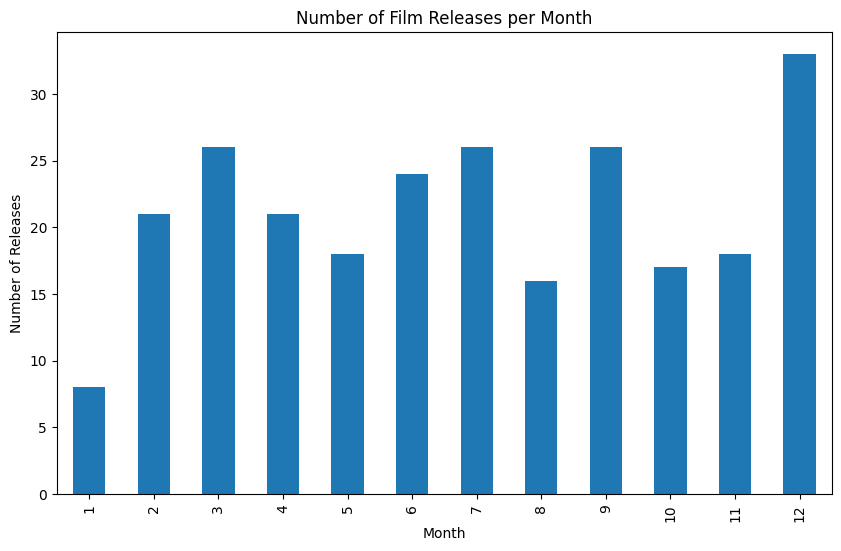

In [ ]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime
movies_df['Date'] = pd.to_datetime(movies_df['Date'])

# Extract the month from the date
movies_df['Month'] = movies_df['Date'].dt.month

# Plot the number of releases per month
plt.figure(figsize=(10, 6))
movies_df['Month'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Number of Film Releases per Month')
plt.show()


In [ ]:
# Most prolific directors
prolific_directors = movies_df['Director'].value_counts().head(10)

# Most frequent actors
# Split the 'Cast' column and explode it into individual actors
cast_series = movies_df['Cast'].str.split(',').explode().str.strip()
prolific_actors = cast_series.value_counts().head(10)

prolific_directors, prolific_actors


(Director
 Kalyaan               2
 Adhik Ravichandran    2
 R. Kannan             2
 S. Hari Uthraa        2
 Dayal Padmanabhan     2
 Prem Kumar            1
 Velu Doss             1
 S. A. Prabhu          1
 Guru Ramaanujam       1
 G. Siva               1
 Name: count, dtype: int64,
 Cast
 Yogi Babu           14
 Santhosh Prathap     5
 Samuthirakani        5
 Vidya Pradeep        5
 Aishwarya Rajesh     5
 Vivek Prasanna       4
 Srikanth             4
 R. Sarathkumar       4
 Gayatri Rema         4
 Vijay Antony         4
 Name: count, dtype: int64)

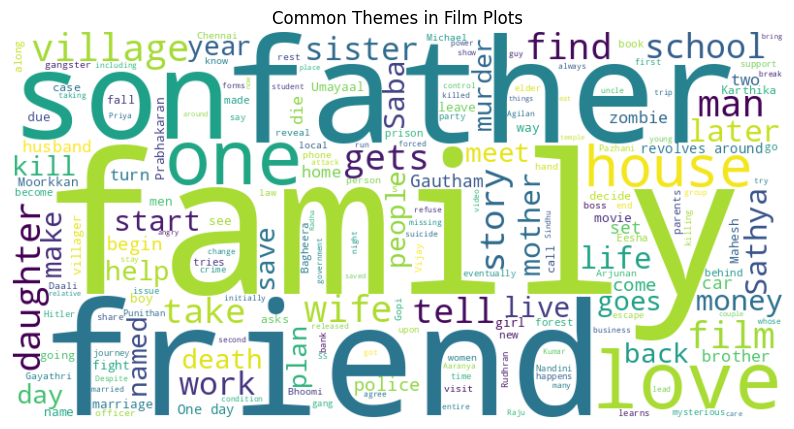

In [ ]:
from wordcloud import WordCloud

# Combine all the plot summaries into a single string
all_plots = ' '.join(movies_df['Plot'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_plots)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Themes in Film Plots')
plt.show()


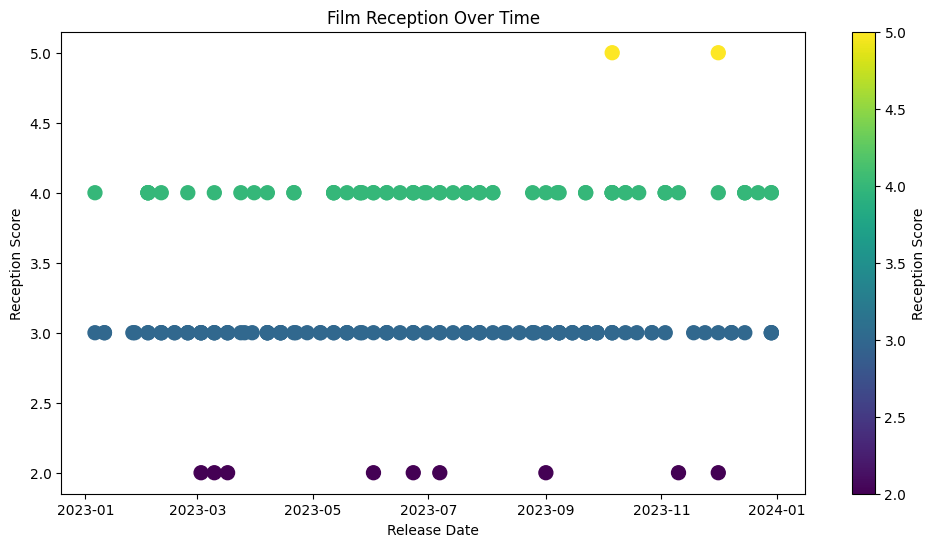

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob


# Function to calculate sentiment polarity
def get_sentiment(text):
    if pd.isna(text):
        return None
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the function to the 'Reception' column
movies_df['Reception Sentiment'] = movies_df['Reception'].apply(get_sentiment)

# Function to map sentiment polarity to a score from 1 to 5
def map_sentiment_to_score(polarity):
    if pd.isna(polarity):
        return None
    if polarity < -0.6:
        return 1
    elif polarity < -0.2:
        return 2
    elif polarity < 0.2:
        return 3
    elif polarity < 0.6:
        return 4
    else:
        return 5

# Apply the function to the 'Reception Sentiment' column
movies_df['Reception Score'] = movies_df['Reception Sentiment'].apply(map_sentiment_to_score)

# Plot the reception score over time with color gradient
plt.figure(figsize=(12, 6))
sc = plt.scatter(movies_df['Date'], movies_df['Reception Score'], c=movies_df['Reception Score'], cmap='viridis', s=100)
plt.colorbar(sc, label='Reception Score')
plt.xlabel('Release Date')
plt.ylabel('Reception Score')
plt.title('Film Reception Over Time')
plt.show()

In [ ]:
# Sort the DataFrame by 'Reception Score' in descending order
top_movies = movies_df.sort_values(by='Reception Score', ascending=False).head(10)

# Display the top 10 movies with their titles and reception scores
top_movies[['Title', 'Reception Score']]


,Title,Reception Score
224,Sooragan,5.0
193,Shot Boot Three,5.0
0,Dear Death,4.0
112,Thalainagaram 2,4.0
140,Love,4.0
135,Appatha,4.0
132,Raakadhan,4.0
130,Echo,4.0
128,Aneethi,4.0
126,Maaveeran,4.0


In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def calculate_sentiment(text):
    if pd.isna(text):
        return None
    sentiment = analyzer.polarity_scores(text)['compound']
    return sentiment

# Apply the function to the 'Reception' column
movies_df['Reception Sentiment'] = movies_df['Reception'].apply(calculate_sentiment)

# Function to map sentiment score to a 1-5 scale
def map_sentiment_to_score(sentiment):
    if sentiment is None:
        return None
    if sentiment < -0.6:
        return 1
    elif sentiment < -0.2:
        return 2
    elif sentiment < 0.2:
        return 3
    elif sentiment < 0.6:
        return 4
    else:
        return 5

# Apply the function to the 'Reception Sentiment' column
movies_df['Reception Score'] = movies_df['Reception Sentiment'].apply(map_sentiment_to_score)

# Sort the DataFrame by 'Reception Score' in descending order
top_movies = movies_df.sort_values(by='Reception Score', ascending=False).head(50)

# Display the top 10 movies with their titles and reception scores
top_movies[['Title', 'Reception Score']]


,Title,Reception Score
0,Dear Death,5
141,Pizza 3: The Mummy,5
143,Yokkiyan,5
144,Kallarai,5
145,Lockdown Diarie,5
146,Priyamudan Priya,5
150,Vaan Moondru,5
152,Vivasayi Ennum Naan,5
154,Adiyae,5
155,Black 'n' White,5


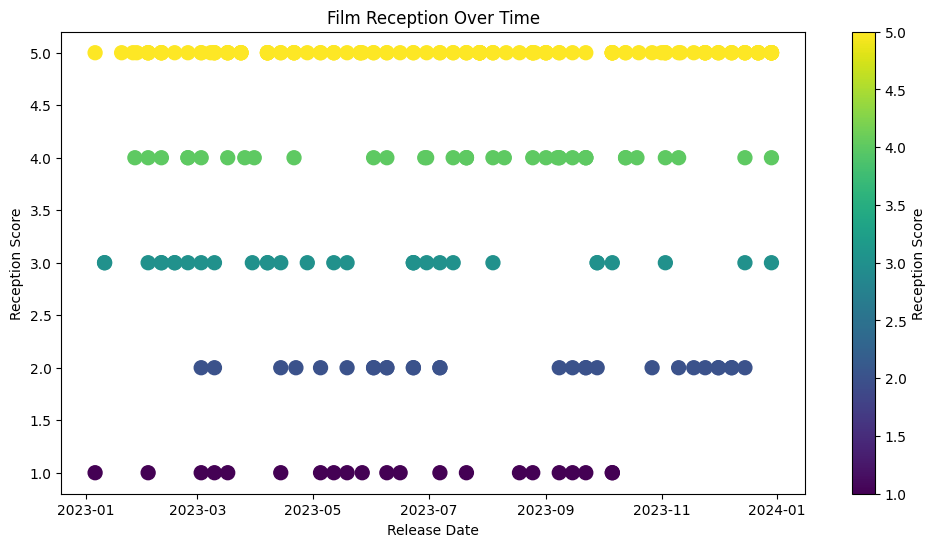

In [ ]:
plt.figure(figsize=(12, 6))
sc = plt.scatter(movies_df['Date'], movies_df['Reception Score'], c=movies_df['Reception Score'], cmap='viridis', s=100)
plt.colorbar(sc, label='Reception Score')
plt.xlabel('Release Date')
plt.ylabel('Reception Score')
plt.title('Film Reception Over Time')
plt.show()

In [ ]:
# Filter the DataFrame for movies released in October
october_movies = movies_df[movies_df['Date'].dt.month == 10]

# Display the movies released in October
october_movies[['Date', 'Title']]


,Date,Title
186,2023-10-06,800
187,2023-10-06,Dhillu Irundha Poradu
188,2023-10-06,En Iniye Thanimaye
189,2023-10-06,Enaku Endey Kidaiyaathu
190,2023-10-06,Indha Crime Thappilla
191,2023-10-06,Irugapatru
192,2023-10-06,Raththam
193,2023-10-06,Shot Boot Three
194,2023-10-06,The Road
195,2023-10-13,Akku


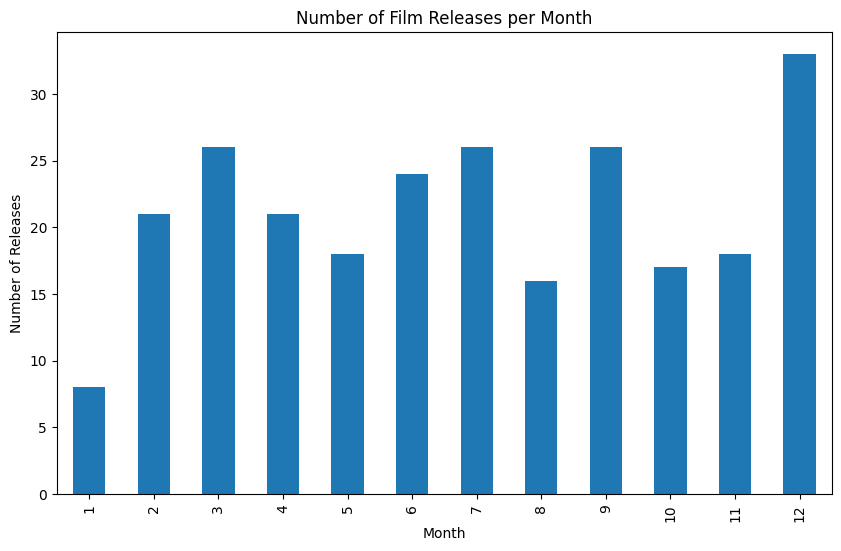

In [ ]:
# Plot the number of releases per month
plt.figure(figsize=(10, 6))
movies_df['Month'] = movies_df['Date'].dt.month
movies_df['Month'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Number of Film Releases per Month')
plt.show()


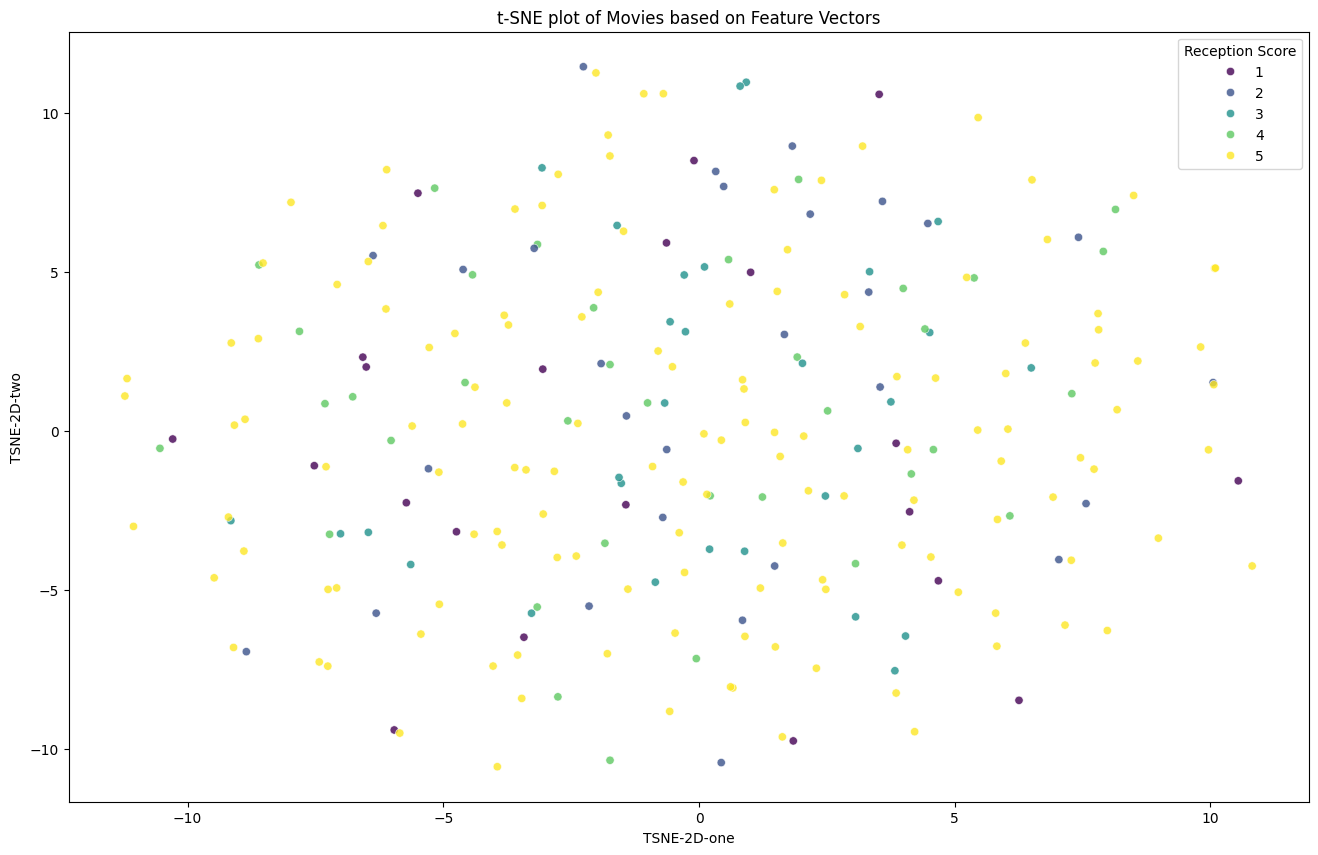

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

# Assuming you have some feature vectors for the movies
# For demonstration, let's create some random feature vectors
import numpy as np

# Create random feature vectors for the movies (e.g., 100-dimensional)
np.random.seed(42)
features = np.random.rand(len(movies_df), 100)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Add t-SNE results to the DataFrame
movies_df['TSNE-2D-one'] = tsne_results[:, 0]
movies_df['TSNE-2D-two'] = tsne_results[:, 1]

# Plot the t-SNE results
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="TSNE-2D-one", y="TSNE-2D-two",
    hue="Reception Score",
    palette=sns.color_palette("viridis", as_cmap=True),
    data=movies_df,
    legend="full",
    alpha=0.8
)
plt.title('t-SNE plot of Movies based on Feature Vectors')
plt.show()


In [ ]:
from transformers import pipeline

# Initialize the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Function to get sentiment score using BERT
def get_sentiment_bert(text):
    if pd.isna(text):
        return None
    result = sentiment_pipeline(text)[0]
    score = result['score'] if result['label'] == 'POSITIVE' else -result['score']
    return score

# Apply the function to the 'Reception' column
movies_df['Reception Sentiment BERT'] = movies_df['Reception'].apply(get_sentiment_bert)

# Function to map sentiment score to a 1-5 scale
def map_sentiment_to_score(sentiment):
    if sentiment is None:
        return None
    if sentiment < -0.6:
        return 1
    elif sentiment < -0.2:
        return 2
    elif sentiment < 0.2:
        return 3
    elif sentiment < 0.6:
        return 4
    else:
        return 5

# Apply the function to the 'Reception Sentiment BERT' column
movies_df['Reception Score BERT'] = movies_df['Reception Sentiment BERT'].apply(map_sentiment_to_score)

# Plot the reception score over time with color gradient using BERT
plt.figure(figsize=(12, 6))
sc = plt.scatter(movies_df['Date'], movies_df['Reception Score BERT'], c=movies_df['Reception Score BERT'], cmap='viridis', s=100)
plt.colorbar(sc, label='Reception Score (BERT)')
plt.xlabel('Release Date')
plt.ylabel('Reception Score (BERT)')
plt.title('Film Reception Over Time (Using BERT)')
plt.show()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (526 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (526) must match the size of tensor b (512) at non-singleton dimension 1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Create TF-IDF vectors for the plots
tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(movies_df['Plot'].dropna())

# Perform PCA to reduce dimensions before applying t-SNE
pca = PCA(n_components=50)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(pca_result)

# Add t-SNE results to the DataFrame
movies_df['TSNE-2D-one'] = None
movies_df['TSNE-2D-two'] = None
movies_df.loc[movies_df['Plot'].notna(), 'TSNE-2D-one'] = tsne_results[:, 0]
movies_df.loc[movies_df['Plot'].notna(), 'TSNE-2D-two'] = tsne_results[:, 1]

# Plot the t-SNE results for plots
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="TSNE-2D-one", y="TSNE-2D-two",
    hue="Reception Score",
    palette=sns.color_palette("viridis", as_cmap=True),
    data=movies_df[movies_df['Plot'].notna()],
    legend="full",
    alpha=0.8
)
plt.title('t-SNE plot of Movie Plots')
plt.show()


In [ ]:
movies_df.to_csv("tamil_film_2023_db.csv")